# **Geometric approach**

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

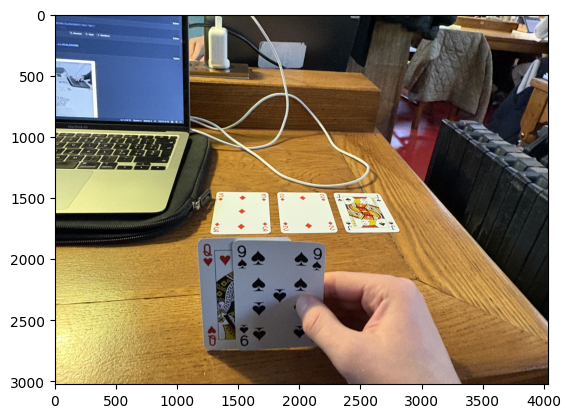

In [8]:
image_path = "./images/IMG_0030.jpeg"

image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [15]:
def rgb2gray(img):
    gray = img.copy()
    gray[:, :, 0] = .299 * img[:, :, 0] + .587 * img[:, :, 1] + .114 * img[:, :, 2]
    gray[:, :, 1] = .299 * img[:, :, 0] + .587 * img[:, :, 1] + .114 * img[:, :, 2]
    gray[:, :, 2] = .299 * img[:, :, 0] + .587 * img[:, :, 1] + .114 * img[:, :, 2]
    return gray

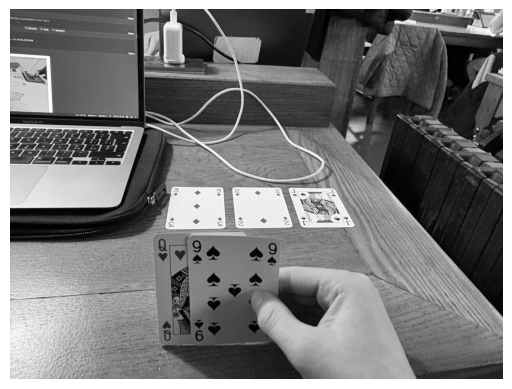

In [16]:
gray = rgb2gray(image)
plt.imshow(gray)
plt.axis('off')
plt.show()

(-0.5, 4031.5, 3023.5, -0.5)

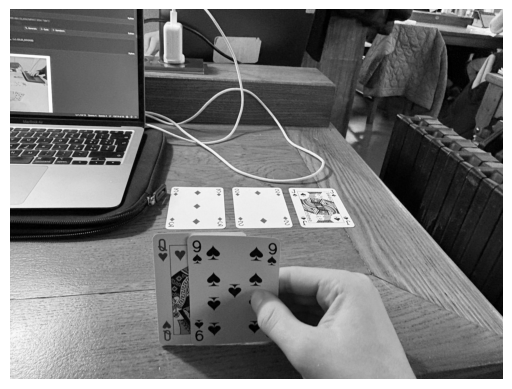

In [17]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)
plt.axis('off')

(-0.5, 4031.5, 3023.5, -0.5)

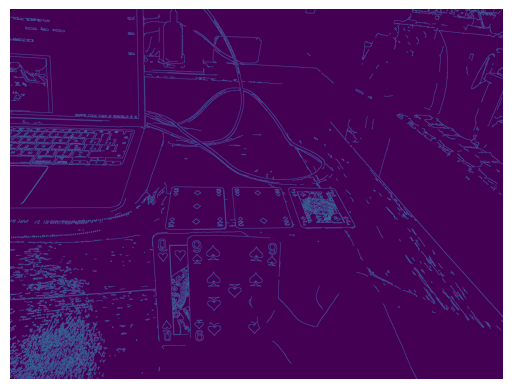

In [18]:
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)
plt.axis('off')

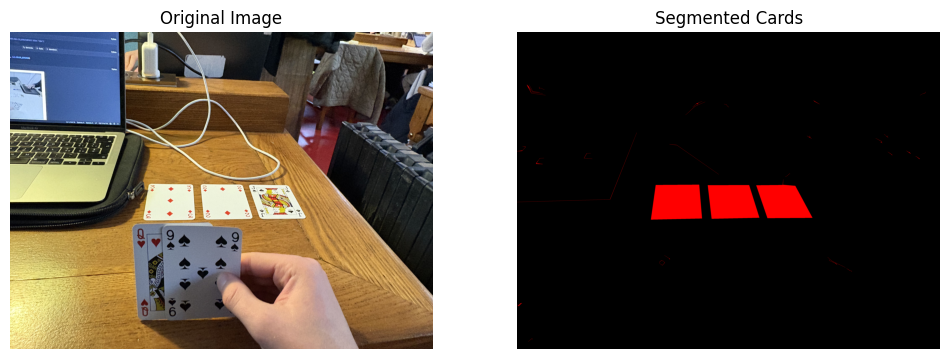

In [8]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(gray)
A_list = []
for contour in contours:

    epsilon = 0.02 * cv2.arcLength(contour, True)
    poly = cv2.approxPolyDP(contour, epsilon, True) # Approximate a polygon based on the contour

    if 4 <= len(poly) <= 8: # Becuase of approximation we check if the polygon has a number of polygons between 4 and 8
        x, y, w, h = cv2.boundingRect(poly) 
        aspect_ratio = w / float(h)
        A = w * h

        if A >= 1000 and 1.3 <= aspect_ratio <= 1.8:
            cv2.drawContours(mask, [poly], -1, 255, -1) 


plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Segmented Mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Segmented Cards")
plt.axis('off')

plt.show()


In [9]:
path_name = '../shared_data/kaggle_playing_card_ataset/Images/Images/'